# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import Data

In [2]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
print(train_data.shape, test_data.shape)

(1460, 81) (1459, 80)


In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Preprocessing

### Checking Duplicate 

In [5]:
print(train_data['Id'].nunique() == train_data['Id'].count())
print(test_data['Id'].nunique() == test_data['Id'].count())

True
True


### Missing Data


Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

In [6]:
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.shape[0]).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)



,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


**How to deal with missing data**

There are 2 ways we can deal with missing data.

1. Delete variables or observations.

in cases of deleting variables, when more than 50 or 30% of the data is missing, we should delete the corresponding variable. The point here is 'will we miss this data?' No. it is likely that these variables (e.g. 'PoolQC', 'MiscFeature') are not important aspects to consider when buying a house.

In what concerns the remaining cases, less percentage of missing data, we can delete these observations with missing data. Consider reducing the size of dataset

2. Impute missing values

There is many options we could consider when replacing a missing value
- a constant value that has meaning within the domain, such as ), distinct from all other values
- a value from another randomly selected record
- a mean, median or mode value for a column
- a value estimated by another predictive model


Notes: Not all algorithms fail when there is missing data.
There  are algorithms that can be made rebust to missing data, such as k-Nearest Neighbors that can ignore a column from a distance measure when a value is missing. Naive Bayes can aslo support missing values when making a prediction.
Sadly, the scikit-learn implementations of naive bayes, decision tree and k-Nearest Neighbor are not rebust to missing values. Although t is being considered,




**Deleting variables with missing values**

we are going to delete varibles with ratio of missing values is greater than 15%.


In [7]:
train_data = train_data.drop((missing_data[missing_data['Percent'] >= 0.15]).index,1)
train_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


**Imputing missing values**








- **GarageType, GarageFinish, GarageQual and GarageCond:** Replacing missing data with None


In [8]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_data[col] = train_data[col].fillna('None')


- **GarageYrBlt, GarageArea and GarageCars:** Replacing missing data with 0 since no garage is no cars in such garage

In [9]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train_data[col] = train_data[col].fillna(0)

- **BsmtQual,BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2:** for all these categorical basement-related feartures, Nan means that there is no basement.

In [10]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    train_data[col] = train_data[col].fillna('None')

- **MasVnrArea and MasVnrType** NA most likely menas no masonry veneer for these houses, We can fill ) for the area and Non for the type

In [11]:
train_data["MasVnrType"] = train_data["MasVnrType"].fillna("None")
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(0)

- **Electrical :**  It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [12]:
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])

**Is there any remaining missing value?**

In [13]:
train_data.isnull().sum().max()

0

## Handling Outliers

Before mentioning how outliers can be handeled, it is true that the best way to detect the outliers is to demonstrate the data visually. All other statistical methodologies are open to making mistakes, whereas visualizing the outliers gives a chance to take a secision with high precision. 

Statistical mothodologies are less precise but on the other hand, they have a superioty and fast.

There are two diffirent ways of handing outliers detecting them using **standard deviation** and **percentiles**

After detect outlier then we can decide to to delete outliers

**Examples. Detect outliers by visualizing**

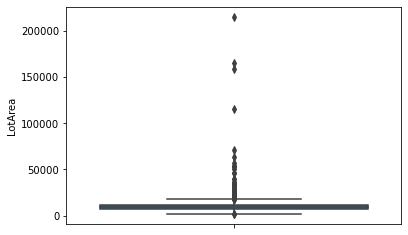

In [14]:
ax = sns.boxplot(y = 'LotArea', data = train_data)

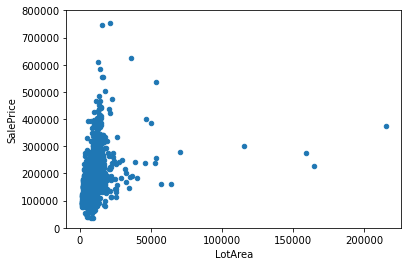

In [15]:
#bivariate analysis saleprice/LotArea
var = 'LotArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


The some values with bigger 'LotArea' seem strange and they are not following the crowd. we can define them as outliers and delete them.

**Examples. Detect outliers with Standard Deviation**

If a value has a distance to the average higher than **x * standard deviation**, it can be assumed as an outlier. Then what **x** should be?

there is no trivial solution for **x**, but usually, a value between 2 and 4 seems practicals. the default value is 3.

In [16]:
x = 3
upper_lim = train_data['LotArea'].mean () + train_data['LotArea'].std () * x
lower_lim = train_data['LotArea'].mean () - train_data['LotArea'].std () * x
print(upper_lim)
outliers = train_data[train_data['LotArea'] > upper_lim]['LotArea']
print(outliers)

40460.62287932922
53       50271
249     159000
313     215245
335     164660
384      53107
451      70761
457      53227
661      46589
706     115149
769      53504
848      45600
1298     63887
1396     57200
Name: LotArea, dtype: int64


**Examples. Detect outliers with Percentiles**
Another mathematical method to detect outliers is to use percentiles.

we can assume that a certain percent of the value from the top or the bottom as an outlier. the key point is here to set the percaentage value once again and this pepends on the distribution of the data.

Additionally, a common mistake is using the percentiles according to the range of the data. In other words, if your data ranges from 0 to 100, your top 5% is not the values between 96 and 100. Top 5% means here the values that are out of the 95th percentile of data.




In [17]:
#Dropping the outlier rows with Percentiles
upper_lim = train_data['LotArea'].quantile(.95)
lower_lim = train_data['LotArea'].quantile(.05)

print(upper_lim)

outliers = train_data[train_data['LotArea'] > upper_lim]['LotArea']
print(outliers)

17401.15
53      50271
66      19900
113     21000
120     21453
159     19378
        ...  
1396    57200
1409    20544
1423    19690
1430    21930
1446    26142
Name: LotArea, Length: 73, dtype: int64


Deleting Outliers

In [18]:
# Delete OutLiers
# train_data = train_data[(train_data['LotArea'] < upper_lim) & (train_data['LotArea'] > lower_lim)]

**Note**

Outliers removel is not always safe. We can decided to delete them as they are very huge and bad. For example, 1000 as an age of a person.

There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data. That's why, instead of removing them all. we will just mange to make some of our models robust on them.

## Exploring Target Variable

In [19]:
SalePrice = train_data['SalePrice']
SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

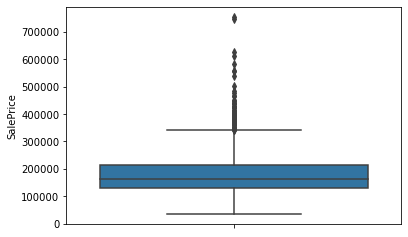

In [20]:
ax = sns.boxplot(y = 'SalePrice', data = train_data)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

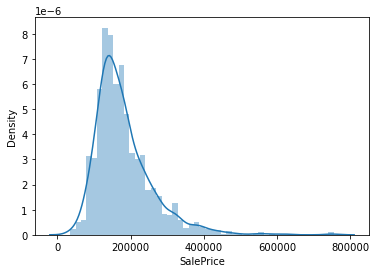

In [21]:
sns.distplot(SalePrice)


* target variable is positively skew
* Normalizing target/dependent variable by logarit transformation

In [22]:
tranf_SalePrice = np.log(SalePrice)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Transformation SalePrice', ylabel='Density'>

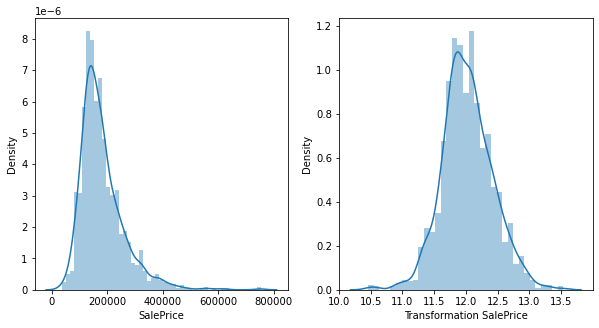

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(SalePrice, ax=ax[0])
sns.distplot(tranf_SalePrice, ax=ax[1], axlabel = 'Transformation SalePrice')

## Handling categorical variables

get dummies all categorical variables

In [24]:
train_data = pd.get_dummies(train_data)
train_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


# Feature Selection

The purposes of selecting features optimizing to get high performance of models and remove irrelevant features. It is also help reduce dimensions. 


# Model Building



3 Best Metrics to evaluate Regression Model

1. R Square

    R square is a good measure to determine how well the model fits the dependent variables. However, it doesn't take into consideration of overfitting problem.
    <img src="https://latex.codecogs.com/svg.latex?\Large&space; R^2= 1 - \frac{\sum_{i} (y_i-y_{ipred})^2}{\sum_{i} (y_i-y_{mean})^2}"/>
    
2. Mean Square Error / Root Mean Square Error(RMSE)
    
    Mean Square Error is an absolute measure of the goodness for the fit.

    <img src="https://latex.codecogs.com/svg.latex?\Large&space; MSE= \frac{1}{N} \sum^{N}_{i=1}  (y_i-y_{ipred})^2 "/>
    
    RMSE is square root of Mean Square Error

3. Mean Absolute Error(MAE)

    Compare to MSE/RMSE, MAE is more direct representation of sum of error terms.
    MSE gives larger penalisation to big prediction error by square it while MAE treats all error the same
    <img src="https://latex.codecogs.com/svg.latex?\Large&space; MAE= \frac{1}{N} \sum^{N}_{i=1}  |y_i-y_{ipred}| "/>

### Split Data

In [25]:
columns = list(train_data.columns)
columns.remove('Id')
columns.remove('SalePrice')

In [26]:
X = train_data[columns]
y = train_data['SalePrice']

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### Linear Regression (Ordinary least squares)

Linear regression is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the **mean squared error** between predictions and the true regression targets,y, on the training set. 

The mean squared error is the sum of the squared differences between the predictions and the true values.

In [27]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
#Prediction
y_pred = lr.predict(X_test)

**Evaluate Linear Regression**

In [29]:
# R square
R2 = lr.score(X_test, y_test)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(R2))

Training set score: 0.94
Test set score: 0.86


In [30]:
# Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.2f}".format(rmse))

Root Mean Squared Error: 26995.24


In [31]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  17343.192530521927


In [32]:
E1 = ['Linear Regression', R2, rmse, mae ]

In [33]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

Training set score: 0.92
Test set score: 0.86
Number of features used: 273


As you can see, the training ser score of Ridge is lower than for Linear Regression, while the test set score is higher. A less complex model means worse performance on training set, but better generalization. As we are only interested in generalization performance, we should choose the Rigde model over the LinearRegression model.


In this example, we used the defaul paramater alpha = 1.0. The optimim setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move toward zero, which decreases training set performance but might help generalization.

In [34]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge10.coef_ != 0)))

Training set score: 0.90
Test set score: 0.87
Number of features used: 273


In [35]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge01.coef_ != 0)))

Training set score: 0.93
Test set score: 0.86
Number of features used: 273


In [36]:
#Prediction
y_pred = ridge.predict(X_test)

**Evaluate Ridge Regression**

In [37]:
# R square
R2 = ridge.score(X_test, y_test)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(R2))

Training set score: 0.92
Test set score: 0.86


In [38]:
# Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.2f}".format(rmse))

Root Mean Squared Error: 26800.09


In [39]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  17992.606090476478


In [40]:
E2 = ['Ridge Regression', R2, rmse, mae ]

### Lasso

An alternative to Ridge for regularizing linear regression. As with ridge regression, using the Lasso also retricts coefficients to be close to zero, but in slightly different way, called L1 regularization. The consequence of L1 regulazition is that using the Lasso, some coefficients are exactly zero. This means some fearures are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret and can reveal the most important features of model. 

In [41]:

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.94
Test set score: 0.88
Number of features used: 237


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252679581911.41214, tolerance: 769913181.1376123
  positive)


In [42]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.94
Test set score: 0.87
Number of features used: 253


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30069414202.201355, tolerance: 769913181.1376123
  positive)


In [43]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.94
Test set score: 0.87
Number of features used: 269


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118417986410.22952, tolerance: 769913181.1376123
  positive)


**Prediction**

In [44]:

y_pred = lasso.predict(X_test)

**Evaluate Lasso Regression**

In [45]:
# R square
R2 = lasso.score(X_test, y_test)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.88


In [46]:
# Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.2f}".format(rmse))

Root Mean Squared Error: 25383.06


In [47]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  16856.81661045627


In [48]:
E3 = ['Lasso Regression', R2, rmse, mae ]

# Evaluate models

In [49]:
df = pd.DataFrame([E1, E2, E3],
               columns =['Model', 'R Square', 'RMSE', 'MAE'])
df

,Model,R Square,RMSE,MAE
0,Linear Regression,0.858843,26995.243689,17343.192531
1,Ridge Regression,0.860877,26800.089574,17992.606090
2,Lasso Regression,0.875200,25383.062666,16856.816610
